In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import missingno as msno

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer,PorterStemmer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jadha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jadha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
df=pd.read_csv('fake_job_postings.csv')

In [70]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [71]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [73]:
df.shape

(17880, 18)

In [74]:
def missing_data(df):
    abs_missing=df.isnull().sum().sort_values(ascending=False)
    perc_missing=np.round((df.isnull().sum()/df.shape[0]*100),2).sort_values(ascending=False)
    missing_df=pd.concat([abs_missing,perc_missing],axis=1,keys=['Total Count','Percentage'])
    return missing_df[missing_df['Total Count']>0]

In [75]:
missing_data(df)

,Total Count,Percentage
salary_range,15012,83.96
department,11547,64.58
required_education,8105,45.33
benefits,7212,40.34
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2696,15.08


In [76]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#Uni-Variate Analysis

In [78]:
df['fraudulent'].value_counts(normalize=True)

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

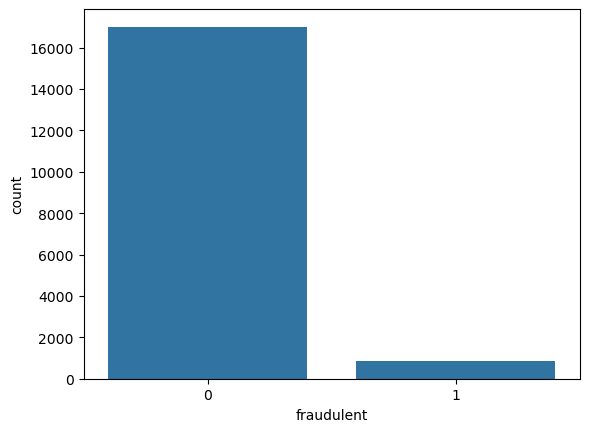

In [79]:
sns.countplot(x=df['fraudulent'])
plt.show()

In [80]:
df.duplicated().sum()

0

In [81]:
df['location'].value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3105, dtype: int64

In [82]:
df['salary_range'].value_counts()

salary_range
0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: count, Length: 874, dtype: int64

In [83]:
df['salary_range'].nunique()

874

In [84]:
df['department'].value_counts()

department
Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: count, Length: 1337, dtype: int64

In [85]:
df['title'].value_counts()

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

In [86]:
df['has_company_logo'].value_counts(normalize=True)

has_company_logo
1    0.795302
0    0.204698
Name: proportion, dtype: float64

In [87]:
df['telecommuting'].value_counts(normalize=True)

telecommuting
0    0.957103
1    0.042897
Name: proportion, dtype: float64

In [88]:
df['employment_type'].value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

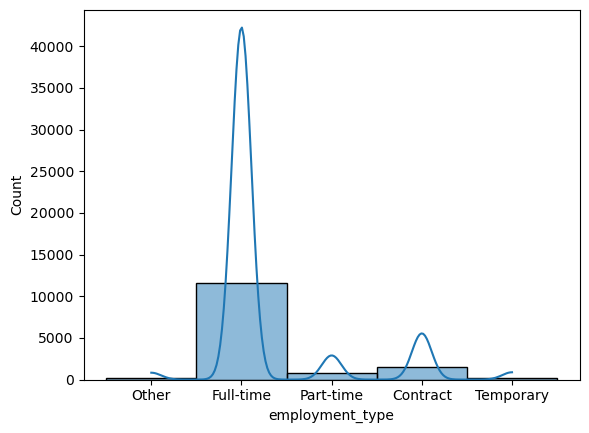

In [89]:
sns.histplot(df['employment_type'],kde=True)
plt.show()

In [90]:
df['industry'].value_counts()

industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 131, dtype: int64

In [91]:
df['required_experience'].value_counts()

required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

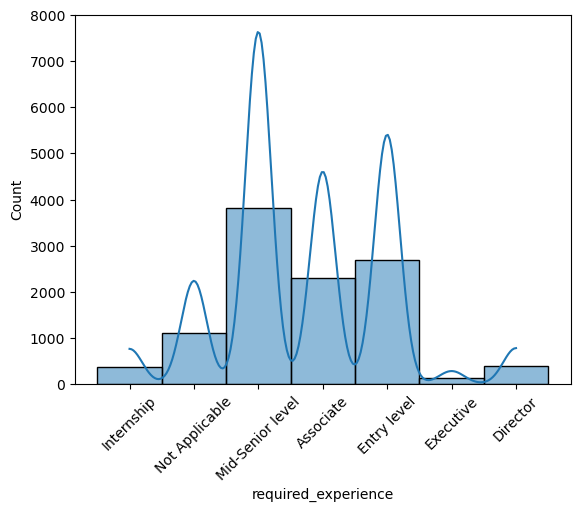

In [92]:
sns.histplot(df['required_experience'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [93]:
df['required_education'].value_counts()

required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

In [94]:
df['function'].value_counts()

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

In [95]:
df['salary_range'].fillna('Unknown',inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\1946351073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_range'].fillna('Unknown',inplace=True)


In [96]:
real_salary_range=df[df['fraudulent']==0]['salary_range']
fake_salary_range=df[df['fraudulent']==1]['salary_range']

In [97]:
df[df['fraudulent']==0]['salary_range'].value_counts()

salary_range
Unknown          14369
0-0                138
40000-50000         65
30000-40000         51
45000-67000         37
                 ...  
15-25                1
300000-325000        1
27500-36000          1
20-22                1
15500-16500          1
Name: count, Length: 829, dtype: int64

In [98]:
df[df['fraudulent']==1]['salary_range'].value_counts()

salary_range
Unknown            643
7200-1380000        10
30000-50000          8
250000-500000        7
28000-32000          6
                  ... 
34000-50000          1
2000-2000            1
6266624-8582080      1
30000-100000         1
0-30000              1
Name: count, Length: 118, dtype: int64

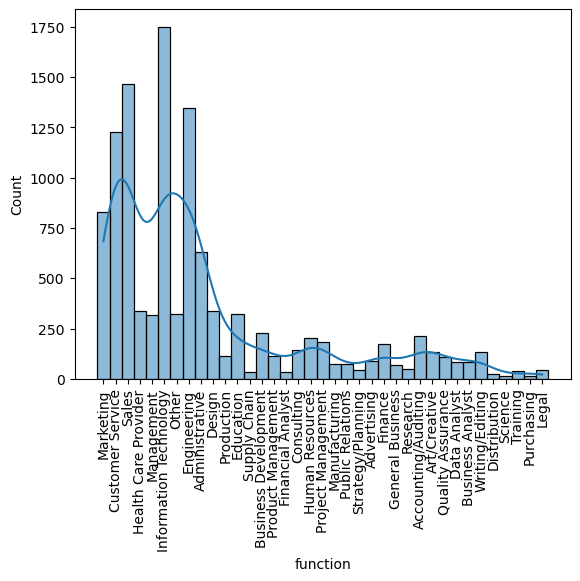

In [99]:
sns.histplot(df['function'],kde=True)
plt.xticks(rotation=90)
plt.show()

<Axes: >

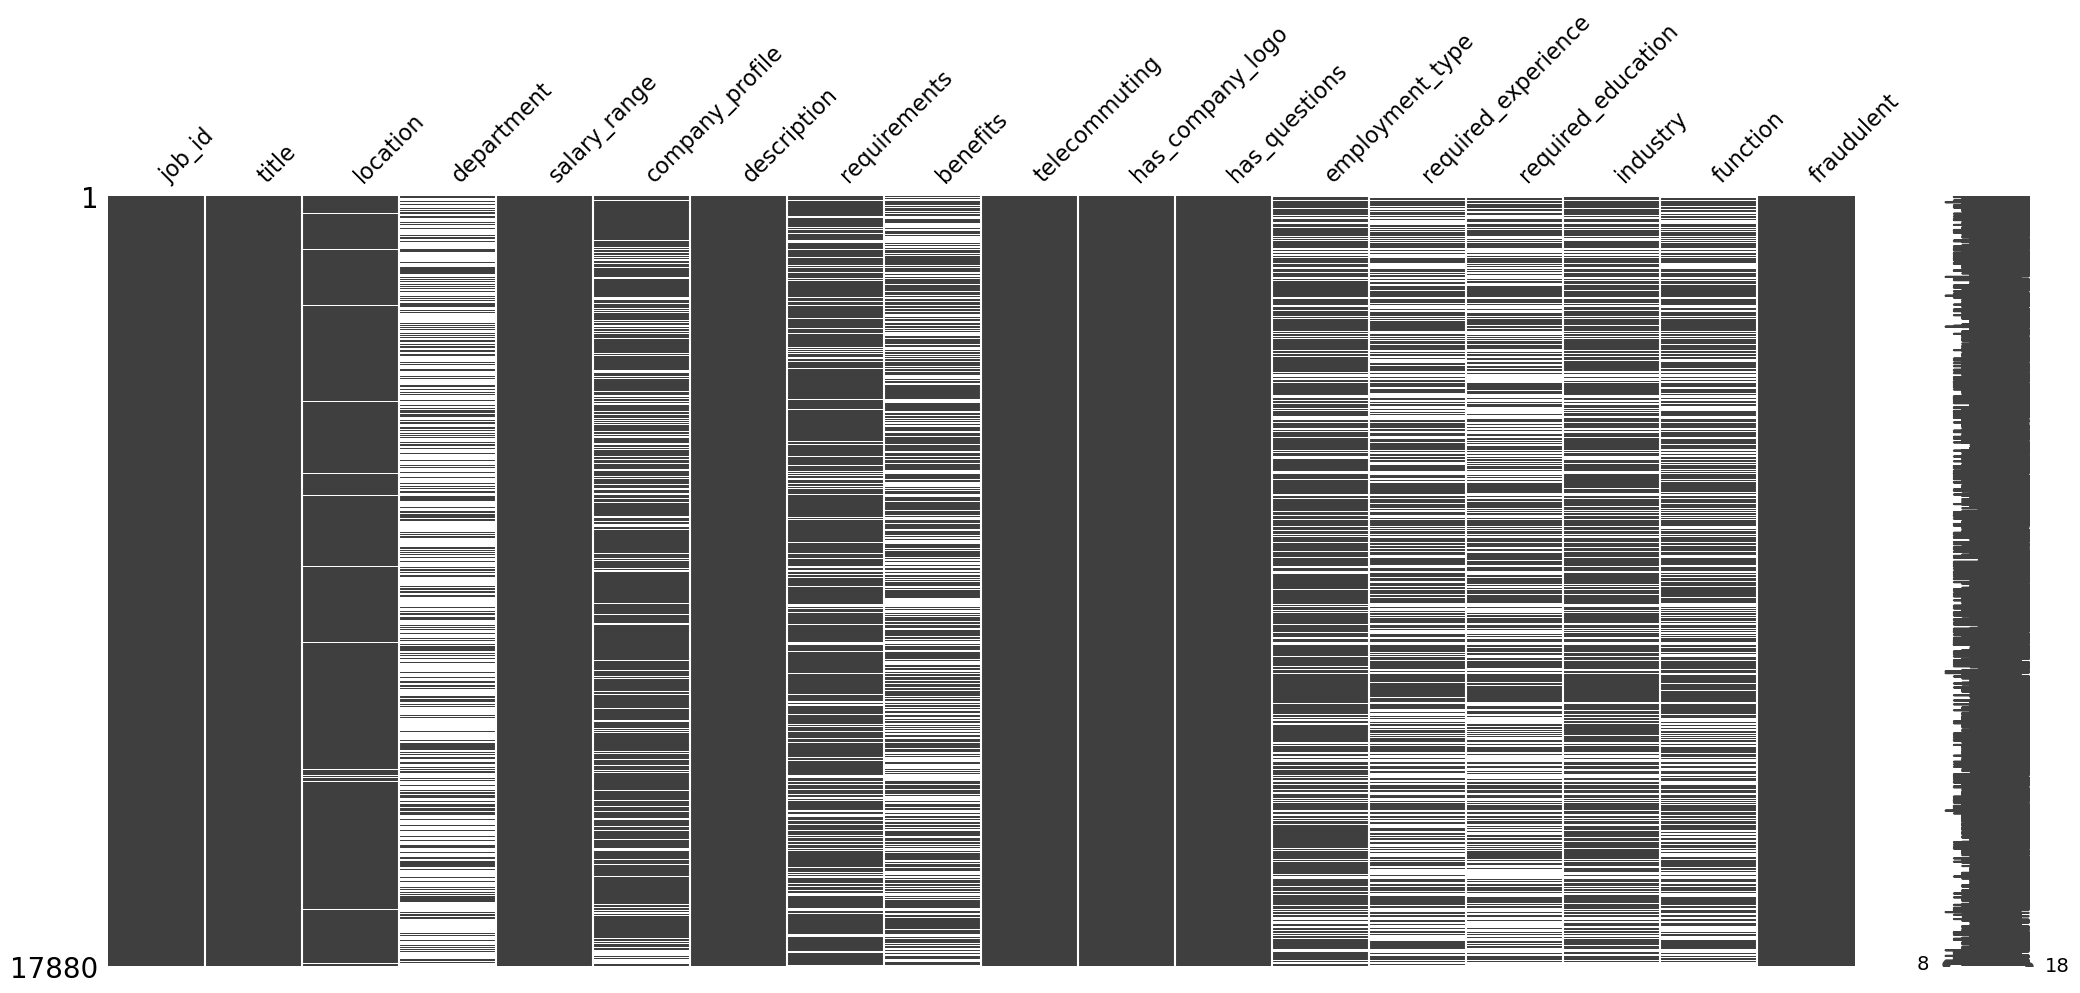

In [100]:
msno.matrix(df)

In [101]:
#Bi-Variate Analysis

In [102]:
df['employment_type'].fillna('Not Known',inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\3664636784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].fillna('Not Known',inplace=True)


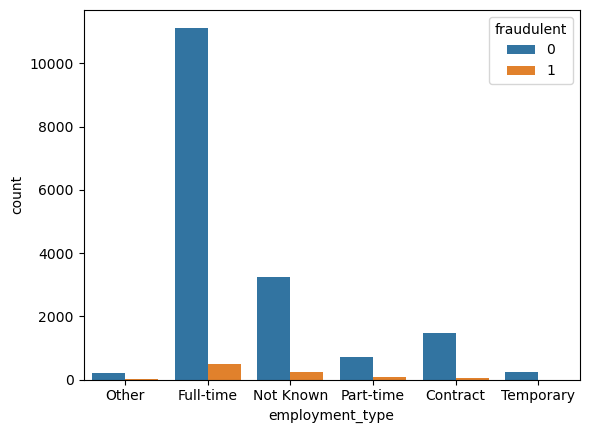

In [103]:
sns.countplot(x=df['employment_type'],hue=df['fraudulent'])
plt.show()

In [104]:
df['required_experience'].fillna('Not Known',inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\2210341677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_experience'].fillna('Not Known',inplace=True)


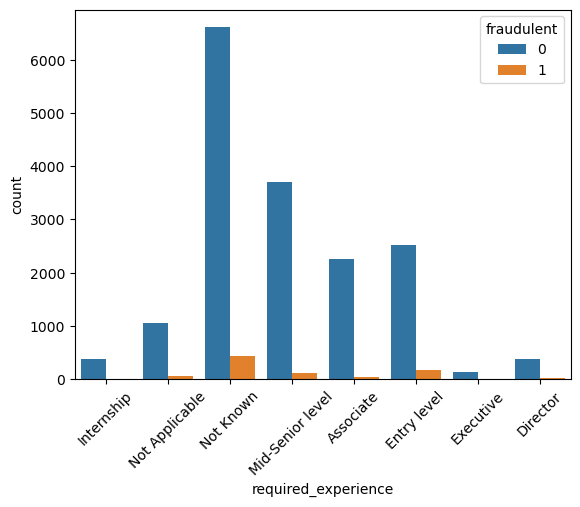

In [105]:
sns.countplot(x=df['required_experience'],hue=df['fraudulent'])
plt.xticks(rotation=45)
plt.show()

In [106]:
df['required_education'].fillna('Not Known',inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\2505255095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_education'].fillna('Not Known',inplace=True)


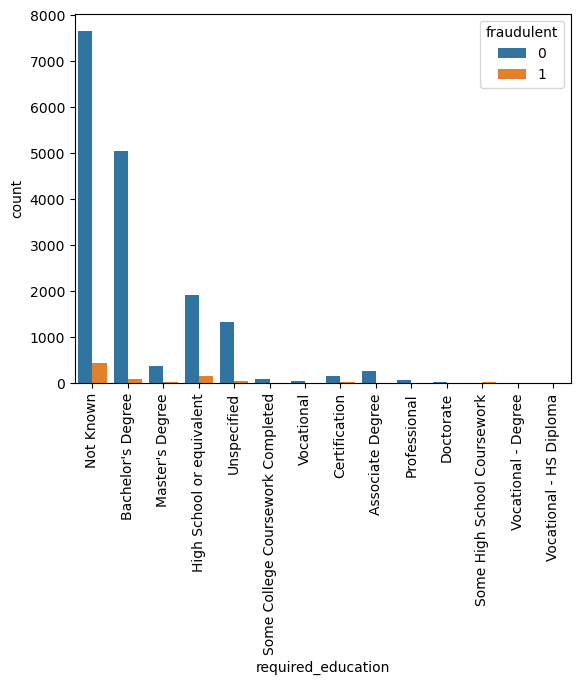

In [107]:
sns.countplot(x=df['required_education'],hue=df['fraudulent'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

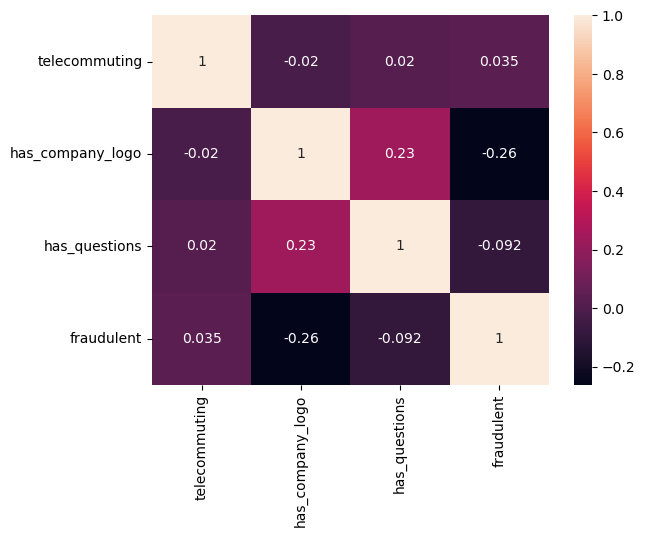

In [108]:
sns.heatmap(df[['telecommuting','has_company_logo','has_questions','fraudulent']].corr(),annot=True)

In [109]:
df['location'].fillna("Not Known",inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\3155673323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna("Not Known",inplace=True)


In [110]:
df['location']=df['location'].apply(lambda x:x.split(',')[0])

In [111]:
text_col=['title','department','company_profile','description','requirements','benefits','industry','function','location']
for i in text_col:
    df[i].fillna("",inplace=True)

C:\Users\jadha\AppData\Local\Temp\ipykernel_11556\542763462.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna("",inplace=True)


In [112]:
missing_data(df)

,Total Count,Percentage


<Axes: >

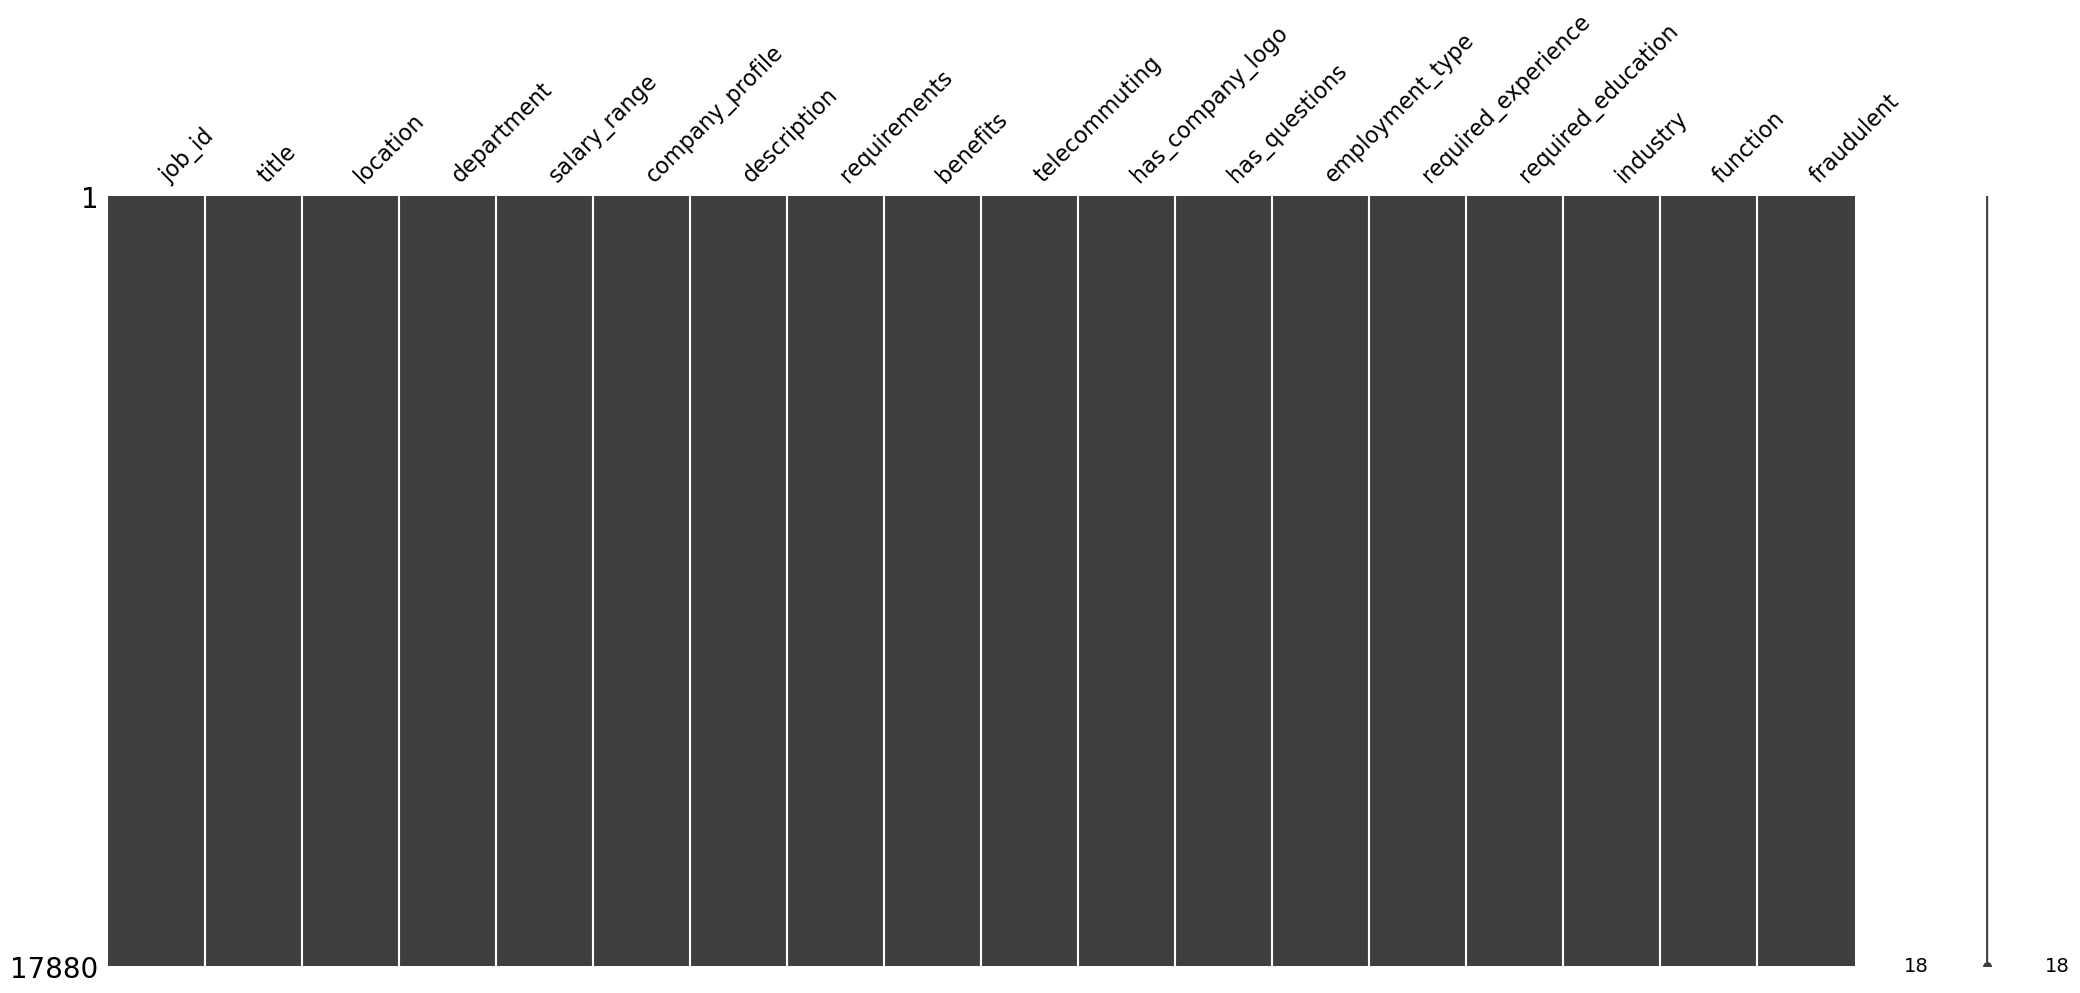

In [113]:
msno.matrix(df)

In [114]:
df['title'][:5]

0                             Marketing Intern
1    Customer Service - Cloud Video Production
2      Commissioning Machinery Assistant (CMA)
3            Account Executive - Washington DC
4                          Bill Review Manager
Name: title, dtype: object

In [115]:
df['company_profile'][:5]

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
Name: company_profile, dtype: object

In [116]:
df['description'][:5]

0    Food52, a fast-growing, James Beard Award-winn...
1    Organised - Focused - Vibrant - Awesome!Do you...
2    Our client, located in Houston, is actively se...
3    THE COMPANY: ESRI – Environmental Systems Rese...
4    JOB TITLE: Itemization Review ManagerLOCATION:...
Name: description, dtype: object

In [117]:
df['function'][:5]

0               Marketing
1        Customer Service
2                        
3                   Sales
4    Health Care Provider
Name: function, dtype: object

In [118]:
df['benefits'][:5]

0                                                     
1    What you will get from usThrough being part of...
2                                                     
3    Our culture is anything but corporate—we have ...
4                                Full Benefits Offered
Name: benefits, dtype: object

In [119]:
df['combined_text']=""

In [120]:
for i in text_col:
    df['combined_text']=df['combined_text']+" "+df[i]

In [121]:
df['combined_text'].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [122]:
stop_eng=set(stopwords.words('english'))
stop_eng.remove('not')

In [123]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', "", text)  # Remove special characters except alphanumeric and space
    text = re.sub(r'<.*?>', "", text)  # Remove HTML tags
    text = re.sub(r'_+', "", text)  # Remove underscores
    text = re.sub(r'\s{2,}', " ", text)  # Replace multiple spaces with a single space
    text = re.sub(r'\d+', "", text)  # Remove digits
    text = re.sub(r'\b\w\b', "", text)  # Remove isolated single characters
    text = text.strip()  # Remove leading and trailing whitespace
    return text


In [124]:
clean_text(df['combined_text'].iloc[0])

'marketing intern marketing were food and weve created  groundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe have  top editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city food  fastgrowing james beard awardwinning online food community and crowdsourced and curated recipe hub is currently inter

In [125]:
import re

def Correct_URL(text):
    # Pattern for detecting valid URLs
    valid_url_pattern = r'\b(?:https?://|www\.)\S+\b'

    # Replace valid URLs with 'ValidURL'
    processed_text = re.sub(valid_url_pattern, 'ValidURL', text)

    # Example check for fraudulent patterns (very basic, can be improved)
    fraud_url_pattern = r'\b(?:http://[0-9]{1,3}\.)+\b'  # IP-based URLs
    processed_text = re.sub(fraud_url_pattern, 'FraudURL', processed_text)

    return processed_text

# Test the function
sample_text = "Visit https://example.com or www.example.org. Beware of http://123.456.789.000"
print(Correct_URL(sample_text))


Visit ValidURL or ValidURL. Beware of ValidURL


In [126]:
df['combined_text']=df['combined_text'].apply(clean_text)
df['combined_text']=df['combined_text'].apply(Correct_URL)

In [127]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun
def lemma(text):
    lemmatizer=WordNetLemmatizer()
    tokenized_word=word_tokenize(text)
    pos_tags = nltk.pos_tag(tokenized_word)

    # Lemmatization with POS Tags
    lemma_word = [
        lemmatizer.lemmatize(token, get_wordnet_pos(pos)) 
        for token, pos in pos_tags 
        if token.lower() not in stop_eng
    ]
    
    final_text = ' '.join(lemma_word)
    return final_text

In [129]:
df['combined_text']=df['combined_text'].apply(lemma)

In [130]:
clean_text(df['combined_text'].iloc[0])

'marketing intern marketing food weve create groundbreaking awardwinning cook site support connect celebrate home cook give everything need one placewe top editorial business engineering team focus use technology find new good way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood name best food website james beard foundation iacp feature new york time npr pando daily techcrunch today showwere locate chelsea new york city food fastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interview full parttime unpaid intern work small team editor executive developer new york city headquartersreproducing andor repackaging exist food content number partner site huffington post yahoo buzzfeed various content management systemsrese

In [131]:
def generate_fraud_wordcloud(df):
    # Filtering fraudulent job descriptions
    fraud_text = " ".join(df[df['fraudulent'] == 1]['combined_text'].astype(str))

    # Generate WordCloud
    plt.figure(figsize=(6,6))
    fraud_wc = WordCloud(width=400, height=400, background_color='black', colormap='Reds').generate(fraud_text)
    plt.imshow(fraud_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Fraudulent Job Postings")
    plt.show()

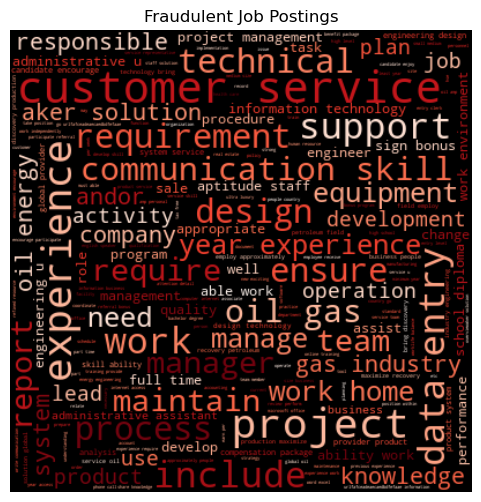

In [132]:
generate_fraud_wordcloud(df)

In [133]:
def generate_non_fraud_wordcloud(df):
    # Filtering non-fraudulent job descriptions
    non_fraud_text = " ".join(df[df['fraudulent'] == 0]['combined_text'].astype(str))

    # Generate WordCloud
    plt.figure(figsize=(5,5))
    non_fraud_wc = WordCloud(width=400, height=400, background_color='black', colormap='Greens').generate(non_fraud_text)
    plt.imshow(non_fraud_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Non-Fraudulent Job Postings")
    plt.show()

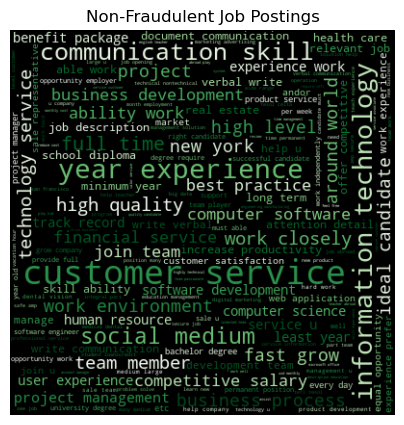

In [134]:
generate_non_fraud_wordcloud(df)

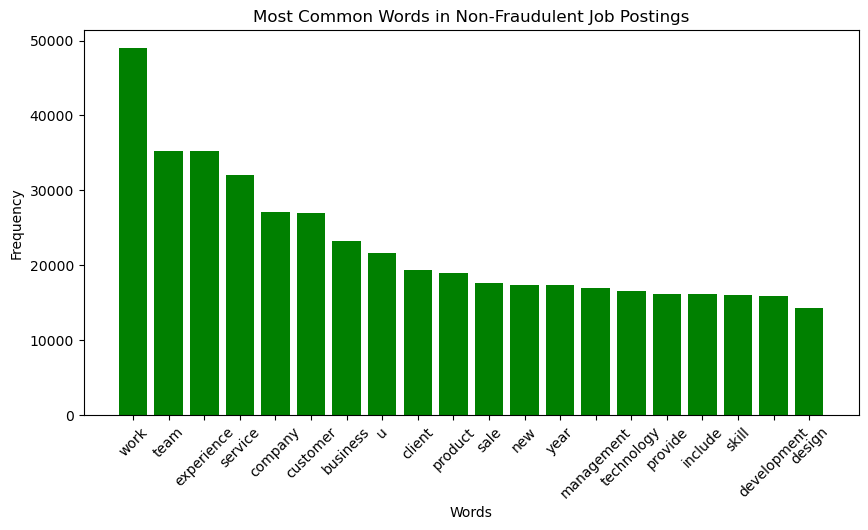

In [135]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import re

def plot_most_common_words(df):
    # Filtering non-fraudulent job descriptions
    non_fraud_text = " ".join(df[df['fraudulent'] == 0]['combined_text'].astype(str))

    # Remove special characters and split into words
    words = re.findall(r'\b\w+\b', non_fraud_text.lower())

    # Count frequency of each word
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)  # Top 20 words

    # Plotting
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='green')
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Most Common Words in Non-Fraudulent Job Postings")
    plt.show()
plot_most_common_words(df)


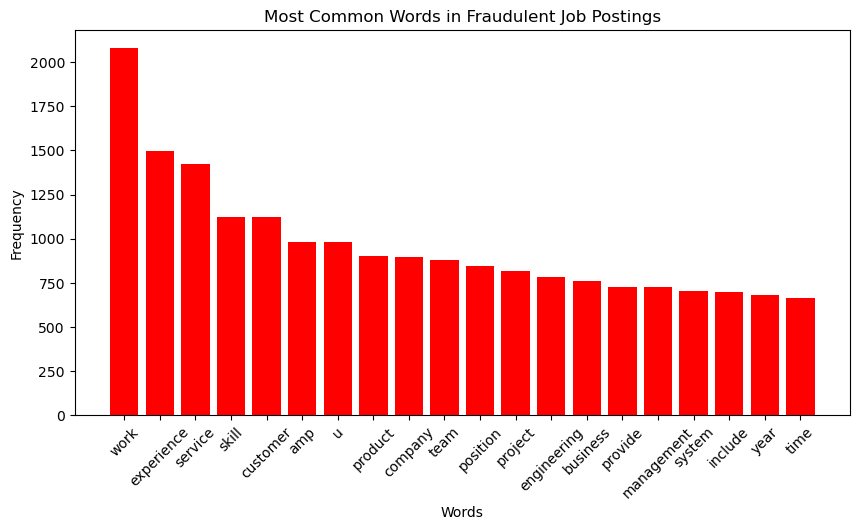

In [136]:
def plot_most_common_words_fraud(df):
    # Filtering fraudulent job descriptions
    fraud_text = " ".join(df[df['fraudulent'] == 1]['combined_text'].astype(str))

    # Remove special characters and split into words
    words = re.findall(r'\b\w+\b', fraud_text.lower())

    # Count frequency of each word
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)  # Top 20 words

    # Plotting
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='red')
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Most Common Words in Fraudulent Job Postings")
    plt.show()
plot_most_common_words_fraud(df)

In [137]:
# One-Hot Encoding
df_dummies = pd.get_dummies(
    df[['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']],
    columns=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education'],
    prefix=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education'],
    drop_first=True
).astype(int)


In [138]:
df_dummies.head()

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,required_education_High School or equivalent,required_education_Master's Degree,required_education_Not Known,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
## Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,              # Converts all text to lowercase
    stop_words='english',        # Removes common English stopwords
    strip_accents='unicode',     # Removes accents using Unicode normalization
    analyzer='word',             # Analyzes at the word level
    max_features=5000,           # Limits the vocabulary size to 5000 terms
    ngram_range=(1, 2),          # Considers unigrams and bigrams (1 and 2-word combinations)
    sublinear_tf=True,           # Applies sublinear term frequency scaling (1 + log(tf))
    smooth_idf=True              # Smooths idf weights by adding 1 to document frequencies
)

## Fitting the data
vectorizer.fit(df['combined_text'])        # Learns vocabulary and IDF from the data
X =vectorizer.transform(df['combined_text'])  # Transforms the text to a TF-IDF matrix


In [140]:
X.shape

(17880, 5000)

In [141]:
tfidf_df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,aan,ab,abc,abc supply,ability,ability adapt,ability build,ability communicate,ability effectively,ability learn,...,young people,youre,youre look,youth,youtube,youve,youyou,zealand,zero,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.070032,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.024008,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.11799,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0


In [142]:
df_processed=pd.concat([df_dummies,tfidf_df],axis=1)

In [143]:
df_processed.shape

(17880, 5028)

In [144]:
## Dropping all the columns that are not needed anymore
df.drop(['job_id', 'title', 'location', 'department', 'salary_range',
         'company_profile', 'description', 'requirements', 'benefits',
         'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
         'required_experience', 'required_education', 'industry', 'function',
         'combined_text'], axis=1, inplace=True)

In [145]:
df.head()

,fraudulent
0,0
1,0
2,0
3,0
4,0


In [146]:
final_df=pd.concat([df_processed,df],axis=1)

In [147]:
final_df.shape

(17880, 5029)

In [148]:
final_df

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,youre,youre look,youth,youtube,youve,youyou,zealand,zero,zone,fraudulent
0,0,1,0,0,0,1,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0
1,0,1,0,1,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.070032,0.000000,0.0,0.0,0.00000,0.000000,0
2,0,1,0,0,1,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0
3,0,1,0,1,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.11799,0.000000,0
4,0,1,1,1,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,1,0,0,0,0,0,0,...,0.06446,0.0,0.0,0.000000,0.051294,0.0,0.0,0.00000,0.000000,0
17876,0,1,1,1,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0
17877,0,0,0,1,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0
17878,0,0,1,0,0,0,0,0,0,0,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0


In [151]:
x=final_df.drop('fraudulent',axis=1)
y=final_df['fraudulent']

In [152]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [153]:
x.head()

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,young people,youre,youre look,youth,youtube,youve,youyou,zealand,zero,zone
0,0,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.070032,0.0,0.0,0.0,0.00000,0.0
2,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.11799,0.0
4,0,1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0


In [154]:
print("xtrain : ",xtrain.shape)
print("xtest : ",xtest.shape)
print("ytrain : ",ytrain.shape)
print("ytest : ",ytest.shape)

xtrain :  (14304, 5028)
xtest :  (3576, 5028)
ytrain :  (14304,)
ytest :  (3576,)


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(xtrain,ytrain)

In [158]:
pred=rfc.predict(xtest)
score=accuracy_score(ytest,pred)
print(score)

0.9776286353467561


In [160]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.56      0.72       181

    accuracy                           0.98      3576
   macro avg       0.99      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



In [165]:
import joblib
import pickle
# Save the trained model
joblib.dump(model, "model.joblib")

# Save the TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!
